# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd 
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [54]:
# your answer here
# Tenemos dos tipo string y uno tipo float
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
temp.loc[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
temp.loc[temp["State"] == "New York"].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp.loc[temp["Temperature"] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp.loc[temp["Temperature"] > 15, ["City", "Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp.loc[(temp["Temperature"] > 15) & (temp["Temperature"] < 20), ["City", "Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby(['State']).describe()

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee = pd.read_csv("Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
# Encontramos 5 tipo string y dos tipo enteros
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EABE1B0C70>,
      dtype=object)

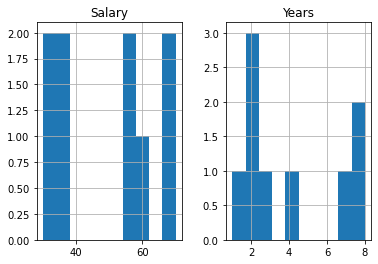

In [13]:
# your answer here
# Tenemos dos principales grupos de salarios (uno más bajo y otro en torno a 60) y respecto a los años, se puede observar que hay mucha más gente que entró recientemente en la empresa comparada con los veteranos
employee.hist()

#### What's the average salary in this company?

In [14]:
# your answer here
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
# your answer here
employee["Salary"].max()

70

#### What's the lowest salary?

In [16]:
# your answer here
lowest = employee["Salary"].min()
lowest

30

#### Who are the employees with the lowest salary?

In [17]:
# your answer here
employee.loc[employee["Salary"] == lowest , ["Name"]]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [18]:
# your answer here
employee.loc[employee["Name"]=="David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
employee.loc[employee["Name"]=="David", ["Salary"]]

,Salary
2,30


#### Print all the rows where job title is associate

In [20]:
# your answer here
employee.loc[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
employee.loc[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
employee.groupby(["Years"]).describe()

Salary                                                    
       count       mean        std   min   25%   50%   75%   max
Years                                                           
1        1.0  35.000000        NaN  35.0  35.0  35.0  35.0  35.0
2        3.0  38.333333  14.433757  30.0  30.0  30.0  42.5  55.0
3        1.0  55.000000        NaN  55.0  55.0  55.0  55.0  55.0
4        1.0  35.000000        NaN  35.0  35.0  35.0  35.0  35.0
7        1.0  60.000000        NaN  60.0  60.0  60.0  60.0  60.0
8        2.0  70.000000   0.000000  70.0  70.0  70.0  70.0  70.0

####  What is the average Salary per title?

In [25]:
# your answer here
employee.groupby(["Title"]).describe()

Years                                           Salary             \
          count  mean       std  min   25%  50%  75%  max  count       mean   
Title                                                                         
VP          2.0  8.00  0.000000  8.0  8.00  8.0  8.0  8.0    2.0  70.000000   
analyst     4.0  2.25  1.258306  1.0  1.75  2.0  2.5  4.0    4.0  32.500000   
associate   3.0  4.00  2.645751  2.0  2.50  3.0  5.0  7.0    3.0  56.666667   

                                                   
                std   min   25%   50%   75%   max  
Title                                              
VP         0.000000  70.0  70.0  70.0  70.0  70.0  
analyst    2.886751  30.0  30.0  32.5  35.0  35.0  
associate  2.886751  55.0  55.0  55.0  57.5  60.0

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

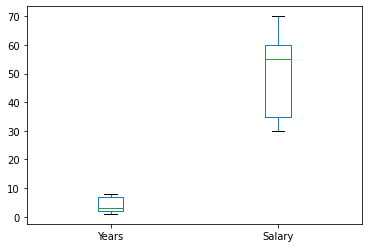

In [26]:
# draw boxplot here
#Respecto a los años, la mayoría de trabajadores se concentran en torno a los 5 años y respecto al salario, la mayoría gana una cantidad en torno a 50/40 llegando a alcanzar los 70 como salario máximo y los 30 como más bajo.
employee.boxplot(grid=False)

In [55]:
# print first quartile here
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [57]:
# print third quartile here
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [29]:
# your answer here
employee.groupby(["Gender"]).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here
employee.groupby(["Department"]).describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here

employee.groupby(["Department"])[["Salary"]].agg(lambda x: x.max()-x.min())

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
# your answer here
orders = pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [33]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [34]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [35]:
# your answer here
orders["amount_spent"].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [36]:
# your answer here
orders["amount_spent"].max()

168469.6

In [37]:
# your answer here
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [38]:
# your answer here
orders.loc[orders["Country"] == "Spain"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [39]:
# your answer here
orders["Country"].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### Select all the customers who have bought more than 50 items ?

In [40]:
# your answer here
orders.loc[orders["Quantity"] > 50]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [53]:
# your answer here
orders.loc[(orders["Country"] == "Spain") & (orders["Quantity"] > 50)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [52]:
# your answer here
orders.loc[orders["amount_spent"] == 0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [43]:
# your answer here
orders[orders["Description"].str.contains("lunch bag")]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [44]:
# your answer here
orders[orders["Description"].str.contains("lunch bag") & (orders["year"] == 2011)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

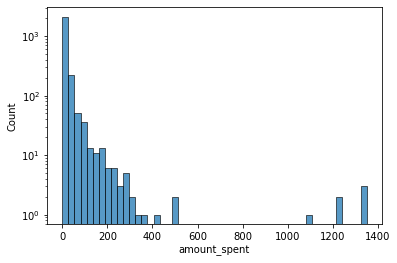

In [45]:
# your answer here
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
sns.histplot(x = "amount_spent", data = orders[orders["Country"] == "Spain"], bins=50)
ax.set_yscale('log')

#### Select all orders made in the month of August

In [46]:
# your answer here
orders.loc[orders["month"] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [47]:
# your answer here
orders.loc[orders["month"] == 8].groupby("Country").sum()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,32576265,60302348,215177,856,438,916,12570,242.98,1328565,22489.20
Austria,26212020,49543386,176968,704,208,880,790,279.71,1116970,1516.08
Belgium,58480484,109287235,390134,1552,739,2448,2069,726.14,2406584,3554.02
Canada,1564810,2822140,10055,40,20,55,52,4.99,89220,51.56
Channel Islands,43046490,78948531,281540,1120,287,1570,2009,626.19,2089177,4896.78
Denmark,4739080,9005648,32176,128,48,160,338,42.89,222704,213.15
EIRE,177784872,333975511,1192523,4744,2423,8087,9331,2123.92,8654983,16967.38
Finland,18366395,34362298,122671,488,264,618,693,283.84,768320,1376.50
France,174350986,320802556,1144259,4552,2200,6641,7958,1813.53,7191464,13810.96


#### What's the  average amount of money spent by country

In [51]:
# your answer here
orders.groupby("Country").describe().head()

Unnamed: 0                                                     \
               count           mean            std       min        25%   
Country                                                                   
Australia     1185.0  224857.287764  116637.822700     197.0  108037.00   
Austria        398.0  297239.085427  123483.105341   34293.0  200421.25   
Bahrain         17.0  184964.000000    7094.832133  181140.0  181144.00   
Belgium       2031.0  276657.968981  139728.891147    7279.0  160027.50   
Brazil          32.0  157314.500000       9.380832  157299.0  157306.75   

                                         InvoiceNo                 ...  \
                50%        75%       max     count           mean  ...   
Country                                                            ...   
Australia  228255.0  304931.00  497685.0    1185.0  556217.951055  ...   
Austria    293458.5  404982.75  536968.0     398.0  562367.633166  ...   
Bahrain    181148.0  181152.00  197374.0      17.0  552790.411765  ...   
Belgium    280861.0  395260.50  541198.0    2031.0  560543.014279  ...   
Brazil     157314.5  157322.25  157330.0      32.0  550201.000000  ...   

          CustomerID          amount_spent                                 \
                 75%      max        count        mean         std    min   
Country                                                                     
Australia    12415.0  16321.0       1185.0  116.895620  159.802296   0.00   
Austria      12818.0  12865.0        398.0   25.624824   34.525167   2.88   
Bahrain      12355.0  12355.0         17.0   32.258824   26.878478  11.60   
Belgium      12431.0  12876.0       2031.0   20.283772   15.248268   2.50   
Brazil       12769.0  12769.0         32.0   35.737500   32.896282  15.00   

                                         
            25%    50%      75%     max  
Country                                  
Australia  17.7  66.00  152.640  1718.4  
Austria    13.5  17.17   22.500   360.0  
Bahrain    17.7  25.50   30.000   120.0  
Belgium    13.2  16.60   20.800   165.0  
Brazil     16.5  19.65   47.475   175.2  

[5 rows x 80 columns]

#### What's the most expensive item?

In [49]:
# your answer here
orders[orders["UnitPrice"] == orders["UnitPrice"].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [50]:
# your answer here
orders.groupby("year").describe()

Unnamed: 0                                                              \
          count           mean            std      min        25%       50%   
year                                                                          
2010    26160.0   19884.040482   11939.096122      0.0    8925.75   19958.5   
2011   371764.0  296660.861310  141192.165773  42481.0  174432.75  301755.5   

                          InvoiceNo                 ... CustomerID           \
            75%       max     count           mean  ...        75%      max   
year                                                ...                       
2010   30121.25   42452.0   26160.0  538009.305122  ...    17179.0  18269.0   
2011  417867.25  541908.0  371764.0  562207.976246  ...    16775.0  18287.0   

     amount_spent                                                          
            count       mean         std  min   25%   50%   75%       max  
year                                                                       
2010      26160.0  21.892733   76.638242  0.0  4.20  10.5  19.8    3828.0  
2011     371764.0  22.430074  319.097516  0.0  4.95  11.9  19.8  168469.6  

[2 rows x 72 columns]